In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
plt.rcParams['text.usetex'] = True

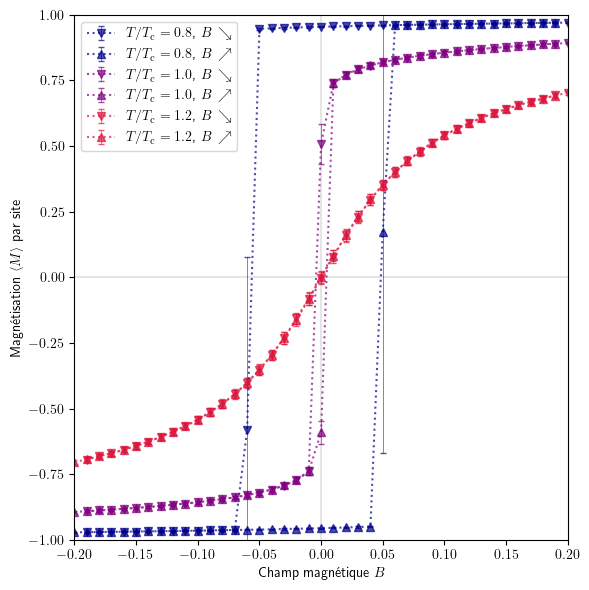

In [60]:
plt.figure(figsize=(6,6))
plt.axhline(y=0, color='grey', alpha=0.2, linestyle='-')
plt.axvline(x=0, color='grey', alpha=0.2, linestyle='-')

def load_and_plot (folder, T, color, descending):

    B = []
    M = []
    varM = []
    
    for k in range(40):
        data = np.loadtxt(f"{folder}/ising_magnétisation_énergie.{k}.txt")
        steps = data[:,0]
        N0 = np.searchsorted(steps, 1e8)
        steps = data[N0:,0]
        magnet = data[N0:,1]
        énergie = data[N0:,2]

        B += [ (-0.2 + 2*0.2 * k/40.) * (-1 if descending else 1) ]
        M += [ np.mean(magnet) ]
        varM += [ np.std(magnet) ]

    marker = 'v' if descending else '^'
    arrow = r"\searrow" if descending else r"\nearrow"
    plt.errorbar(B, M, yerr=varM, linestyle='dotted', lw=1.5, elinewidth=0.5, capsize=2, marker=marker, alpha=0.7, color=color, label=rf"$T/T_\mathrm{{c}}={T}$, $B\,{arrow}$")

load_and_plot("scan_B_T0.8_down", 0.8, 'darkblue', descending=True)
load_and_plot("scan_B_T0.8_up", 0.8, 'darkblue', descending=False)
load_and_plot("scan_B_T1.0_down", 1.0, 'purple', descending=True)
load_and_plot("scan_B_T1.0_up", 1.0, 'purple', descending=False)
load_and_plot("scan_B_T1.2_down", 1.2, 'crimson', descending=True)
load_and_plot("scan_B_T1.2_up", 1.2, 'crimson', descending=False)

plt.ylim(-1,1)
plt.ylabel(r"Magnétisation $\langle M \rangle$ par site")
plt.xlabel(r"Champ magnétique $B$")
plt.xlim(-0.2,0.2)
plt.tight_layout()
plt.legend()
plt.savefig("ising_stats_scanB_updown_200x200_3T.pdf", transparent=True)